In [1]:
from data_pipeline import GetData

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import train_test_split

In [2]:

# for models exept LinearRegression types
# ames_data = GetData(log_price=True, adjust_inflation=True, one_hots=True)
# To allow LinearRegression to converge
ames_data = GetData(log_price=True, adjust_inflation=True, one_hots=False, disable_scaler=True)
ames_data.fit()
X, y = ames_data.transform()

/home/brian/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/brian/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/brian/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 71 columns):
Bedroom AbvGr          2930 non-null int64
TotRms AbvGrd          2930 non-null int64
Garage Cars            2930 non-null float64
Overall Qual           2930 non-null int64
Lot Frontage           2930 non-null float64
Pool Area              2930 non-null int64
Fireplaces             2930 non-null int64
bsmt_qual_             2930 non-null int64
total_baths            2930 non-null int64
bed_to_room_ratio      2930 non-null float64
yrs_since_update       2930 non-null int64
oc_                    2930 non-null int64
yrs_since_sold_        2930 non-null int64
mon_since_sold         2930 non-null int64
month_sold             2930 non-null int64
zoning_                2930 non-null int64
roof_                  2930 non-null int64
kqual_                 2930 non-null int64
neigh_                 2930 non-null int64
lot_shape_             2930 non-null int64
has_huge_liv_area      2930

In [3]:
# because the number of model evaluations would be high make a standard
# final evaluation split with a seed so that the models can't overfit
# for evaluation.  Only score the models on evaluation set rarely
X_TRAIN, X_eval, y_TRAIN, y_eval = train_test_split(X, y, random_state=42, test_size=0.2)

In [4]:
len(X_TRAIN)

log_y_TRAIN = np.log(y_TRAIN)

In [18]:
# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=90)

# Fit and transform
x_best = selector_f.fit_transform(X_TRAIN, log_y_TRAIN)

In [19]:
support = np.asarray(selector_f.get_support())

# Supress displaying long numbers in scientific notation
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(X_TRAIN.columns.values)
features_with_support = features[support]
# print('Top 20% of the best, associated features to SalePrice\n',columns_with_support)
# print('Number of Features:', len(columns_with_support))

#f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)
# top20.index.name = 'Feature'
print('Top 20% best associated features to SalePrice\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))


('Top 20% best associated features to SalePrice\nNumber of features:', 63)
                     F-score   p-value
Overall Qual        4.42e+03  0.00e+00
log_home_sf         2.33e+03  0.00e+00
Garage Cars         1.74e+03 2.81e-284
total_baths         1.17e+03 1.19e-208
yrs_since_update    1.10e+03 3.03e-198
garage_yr_blt       8.81e+02 1.27e-164
garage_type_        7.72e+02 3.91e-147
ext_qual_           6.88e+02 3.03e-133
Fireplaces          6.71e+02 2.96e-130
TotRms AbvGrd       6.33e+02 7.03e-124
log_open_porch_sf   5.76e+02 4.54e-114
Mas Vnr Area        4.84e+02  9.82e-98
kqual_              4.50e+02  1.92e-91
bsmtfin_sf_1        4.44e+02  2.27e-90
log_total_bsmt_sf   4.07e+02  1.63e-83
ac_                 4.05e+02  2.67e-83
zoning_             3.47e+02  2.80e-72
log_lot_area        3.22e+02  1.47e-67
log_wood_deck_sf    3.12e+02  1.40e-65
bed_to_bath_ratio   2.95e+02  2.06e-62
oc_                 2.60e+02  1.88e-55
electrical_         2.38e+02  2.75e-51
Lot Frontage        2.28e+02

(array([  37.,   41.,    1.,   15.,   39.,   33.,   52.,   34.,  187.,
         317.,  241.,  715.,  308.,  141.,   84.,   42.,   34.,    8.,
           8.,    3.,    2.,    0.,    0.,    0.,    2.]),
 array([ 3.04452244,  3.15258967,  3.2606569 ,  3.36872413,  3.47679136,
         3.58485859,  3.69292582,  3.80099305,  3.90906028,  4.01712751,
         4.12519474,  4.23326197,  4.3413292 ,  4.44939643,  4.55746366,
         4.66553089,  4.77359812,  4.88166535,  4.98973258,  5.09779981,
         5.20586704,  5.31393427,  5.4220015 ,  5.53006873,  5.63813596,
         5.74620319]),
 <a list of 25 Patch objects>)

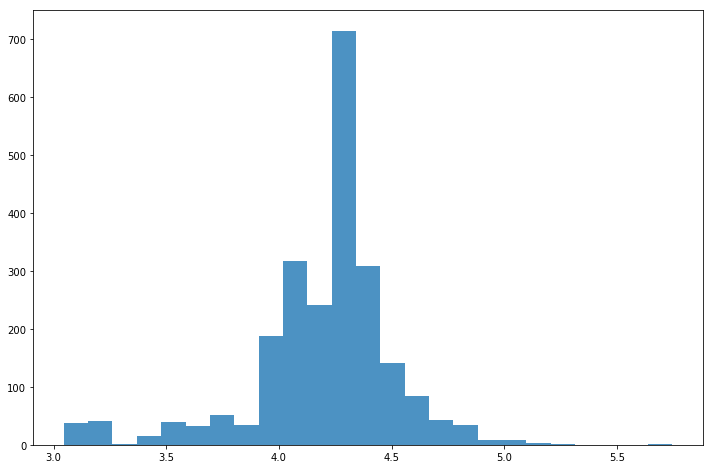

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

col = "Lot Frontage"

# ax.scatter(log_y_TRAIN, X_TRAIN.loc[:,col], alpha=0.2)

# ax.scatter(log_y_TRAIN, np.log(X_TRAIN.loc[:,col]), alpha=0.2)

# ax.hist(X_TRAIN.loc[:,col], bins=25, alpha=0.8)

ax.hist(np.log(X_TRAIN.loc[:,col]), bins=25, alpha=0.8)